In [120]:
import pandas as pd
from itertools import chain
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#la parte converters trata a las columnas como listas
df = pd.read_csv('argenprop.csv',converters={'tipo_moneda': pd.eval,'precio_vivienda': pd.eval,'direccion_vivienda':pd.eval,
                                                'barrio_vivienda':pd.eval,'inmobiliaria':pd.eval,'descripcion_vivenda':pd.eval})

In [66]:
df

,tipo_moneda,precio_vivienda,direccion_vivienda,barrio_vivienda,descripcion_vivenda,inmobiliaria
0,"[USD, USD, USD, USD, USD, $, $, $, $, $, $, $,...",[\nUSD 1.500 \n ...,[\n Juan Maria Gutierrez 39...,"[Departamento en Alquiler en Palermo, Capital ...",[0:\n 2 dorm.\n ...,[https://static1.sosiva451.com/452241_a/5b0a03...
1,"[USD, USD, USD, USD, USD, $, $, $, $, $, $, $,...",[\nUSD 1.500 \n ...,[\n Juan Maria Gutierrez 39...,"[Departamento en Alquiler en Palermo, Capital ...",[0:\n 2 dorm.\n ...,[https://static1.sosiva451.com/452241_a/5b0a03...
2,"[$, $, $, $, USD, USD, $, $, $, $, $, $, $, $,...",[\n$ 390.000 \n ...,[\n La Pampa al 2000\n ...,"[Departamento en Alquiler en Belgrano, Capital...",[0:\n 150 m² cubie.\n...,[https://static1.sosiva451.com/347151_a/527a2f...
3,"[$, $, $, $, $, $, $, $, $, USD, $, USD, $, $,...",[\n$ 90.000 \n \...,"[\n Av Diaz Velez 4500, Pis...","[Departamento en Alquiler en Caballito, Capita...",[0:\n 37 m² cubie.\n ...,"[No aparece Inmobiliaria, https://static1.sosi..."
4,"[$, USD, $, $, $, $, $, USD, $, $, $, $, $, $,...","[\n$ 140.000 \n , \n...",[\n Arenales 1100\n ...,"[Departamento en Alquiler en Recoleta, Barrio ...",[0:\n 30 m² cubie.\n ...,"[No aparece Inmobiliaria, https://static1.sosi..."
...,...,...,...,...,...,...
152,"[$, $, $, $, $, $, $, $, $, $, $, $, USD, USD,...",[\n$ 165.000 \n ...,[\n LA PAMPA 4200\n ...,"[Departamento en Alquiler en Belgrano R, Belgr...",[0:\n 47 m² cubie.\n ...,[https://static1.sosiva451.com/200201_a/4e915e...
153,"[$, $, $, $, $, $, USD, $, $, USD, USD, $, $, ...",[\n$ 80.000 \n \...,[\n TRIUNVIRATO AV. 4100\n ...,"[Departamento en Alquiler en Villa Urquiza, Ca...",[0:\n 36 m² cubie.\n ...,[https://static1.sosiva451.com/454101_a/c4d54f...
154,"[USD, USD, $, USD, $, $, $, $, $, $, $, $, $, ...","[\nUSD 900 \n , \nUS...",[\n Soler 6000\n ...,[Departamento en Alquiler en Palermo Hollywood...,[0:\n 92 m² cubie.\n ...,[https://static1.sosiva451.com/530752_a/bb44e5...
155,"[$, USD, USD, $, $, $, USD, $, $, USD, USD, $,...",[\n$ 68.000 \n \...,[\n Junin al 700\n ...,"[Departamento en Alquiler en Balvanera, Capita...",[0:\n 32 m² cubie.\n ...,[https://static1.sosiva451.com/843762_a/18ad69...


In [67]:
#replace values, preprocessing

df['descripcion_vivenda'] = df['descripcion_vivenda'].apply(lambda x: [i.replace('\n','').replace('  ','') for i in x])



In [68]:
#func and apply method to transform the column into a column of less number of elements of list. Each element starts when the first number changes.

def transform(row):

    lista=[]
    for i in range(20):
        i=str(i)
        string=''
        for element in row:
        
            if element.startswith(i+':'):

                string+=element
    

        lista.append(string)
    return lista

df['descripcion_vivenda_transformed']=df['descripcion_vivenda'].apply(transform)



In [69]:
df

,tipo_moneda,precio_vivienda,direccion_vivienda,barrio_vivienda,descripcion_vivenda,inmobiliaria,descripcion_vivenda_transformed
0,"[USD, USD, USD, USD, USD, $, $, $, $, $, $, $,...",[\nUSD 1.500 \n ...,[\n Juan Maria Gutierrez 39...,"[Departamento en Alquiler en Palermo, Capital ...","[0: 2 dorm., 0: 15 años, 0: 2 baños, 0: 3 ambi...",[https://static1.sosiva451.com/452241_a/5b0a03...,[0: 2 dorm.0: 15 años0: 2 baños0: 3 ambientes0...
1,"[USD, USD, USD, USD, USD, $, $, $, $, $, $, $,...",[\nUSD 1.500 \n ...,[\n Juan Maria Gutierrez 39...,"[Departamento en Alquiler en Palermo, Capital ...","[0: 2 dorm., 0: 15 años, 0: 2 baños, 0: 3 ambi...",[https://static1.sosiva451.com/452241_a/5b0a03...,[0: 2 dorm.0: 15 años0: 2 baños0: 3 ambientes0...
2,"[$, $, $, $, USD, USD, $, $, $, $, $, $, $, $,...",[\n$ 390.000 \n ...,[\n La Pampa al 2000\n ...,"[Departamento en Alquiler en Belgrano, Capital...","[0: 150m² cubie., 0: 3 dorm., 0: A Estrenar, 0...",[https://static1.sosiva451.com/347151_a/527a2f...,[0: 150m² cubie.0: 3 dorm.0: A Estrenar0: 2 ba...
3,"[$, $, $, $, $, $, $, $, $, USD, $, USD, $, $,...",[\n$ 90.000 \n \...,"[\n Av Diaz Velez 4500, Pis...","[Departamento en Alquiler en Caballito, Capita...","[0: 37m² cubie., 0: 1 dorm., 0: 9 años, 0: 1 b...","[No aparece Inmobiliaria, https://static1.sosi...",[0: 37m² cubie.0: 1 dorm.0: 9 años0: 1 baño0: ...
4,"[$, USD, $, $, $, $, $, USD, $, $, $, $, $, $,...","[\n$ 140.000 \n , \n...",[\n Arenales 1100\n ...,"[Departamento en Alquiler en Recoleta, Barrio ...","[0: 30m² cubie., 0: 1 dorm., 0: 1 baño, 0: 2 a...","[No aparece Inmobiliaria, https://static1.sosi...",[0: 30m² cubie.0: 1 dorm.0: 1 baño0: 2 ambient...
...,...,...,...,...,...,...,...
152,"[$, $, $, $, $, $, $, $, $, $, $, $, USD, USD,...",[\n$ 165.000 \n ...,[\n LA PAMPA 4200\n ...,"[Departamento en Alquiler en Belgrano R, Belgr...","[0: 47m² cubie., 0: 1 dorm., 0: 2 años, 0: 1 b...",[https://static1.sosiva451.com/200201_a/4e915e...,[0: 47m² cubie.0: 1 dorm.0: 2 años0: 1 baño0: ...
153,"[$, $, $, $, $, $, USD, $, $, USD, USD, $, $, ...",[\n$ 80.000 \n \...,[\n TRIUNVIRATO AV. 4100\n ...,"[Departamento en Alquiler en Villa Urquiza, Ca...","[0: 36m² cubie., 0: 1 dorm., 0: 30 años, 0: 1 ...",[https://static1.sosiva451.com/454101_a/c4d54f...,[0: 36m² cubie.0: 1 dorm.0: 30 años0: 1 baño0:...
154,"[USD, USD, $, USD, $, $, $, $, $, $, $, $, $, ...","[\nUSD 900 \n , \nUS...",[\n Soler 6000\n ...,[Departamento en Alquiler en Palermo Hollywood...,"[0: 92m² cubie., 0: 10 años, 1: 55m² cubie., 1...",[https://static1.sosiva451.com/530752_a/bb44e5...,"[0: 92m² cubie.0: 10 años, 1: 55m² cubie.1: 1 ..."
155,"[$, USD, USD, $, $, $, USD, $, $, USD, USD, $,...",[\n$ 68.000 \n \...,[\n Junin al 700\n ...,"[Departamento en Alquiler en Balvanera, Capita...","[0: 32m² cubie., 0: Monoam., 0: 7 años, 0: 1 b...",[https://static1.sosiva451.com/843762_a/18ad69...,[0: 32m² cubie.0: Monoam.0: 7 años0: 1 baño0: ...


In [70]:
df['descripcion_vivenda_transformed'][2]
 

['0: 150m² cubie.0: 3 dorm.0: A Estrenar0: 2 baños0: 5 ambientes0: Frente0: Noroeste',
 '1: 100m² cubie.1: 4 dorm.1: 2 baños1: 5 ambientes1: Excelente1: Per. mascota',
 '2: 46m² cubie.2: 2 dorm.2: 37 años2: 1 baño2: 3 ambientes2: Muy Bueno2: Frente2: Sudeste',
 '3: 3 dorm.3: 45 años3: 3 baños3: 4 ambientes3: 1 cocheras',
 '4: 140m² cubie.4: 2 dorm.4: 2 baños4: 3 ambientes4: 1 cocheras4: 1 toilettes4: Excelente4: Frente4: Noreste',
 '5: 55m² cubie.5: 2 dorm.5: 30 años5: 1 baño5: 3 ambientes5: Muy Bueno5: Frente5: Norte',
 '6: 33m² cubie.6: Monoam.6: 15 años6: 1 baño6: 1 ambiente6: Muy Bueno6: Frente6: Noreste',
 '7: 2 dorm.7: 20 años7: 1 baño7: 3 ambientes7: Excelente7: Contra Frente7: Noroeste',
 '8: 65m² cubie.8: 2 dorm.8: 13 años8: 1 baño8: 3 ambientes8: 1 toilettes8: Muy Bueno8: Frente',
 '9: 32m² cubie.9: Monoam.9: 7 años9: 1 baño9: 1 ambiente9: Excelente9: Contra Frente9: Apto profesi.',
 '10: 69m² cubie.10: 2 dorm.10: 50 años10: 1 baño10: 3 ambientes10: 1 toilettes10: Muy Bueno10

In [71]:
df['precio_vivienda'] = df['precio_vivienda'].apply(lambda x: [i.replace('\n','').replace('  ','') for i in x])

df['direccion_vivienda'] = df['direccion_vivienda'].apply(lambda x: [i.replace('\n','').replace('  ','') for i in x])



df['barrio_vivenda'] =df['barrio_vivienda'].apply(lambda x: [i.replace('\n','').replace('  ','') for i in x])


In [72]:
#Para saber que en que primera hoja de la columna faltan datos
#first column

contador=0

for i in df['tipo_moneda']:
    contador+=1
    if len(i)!=20:
        
        print(i,contador,len(i))


[] 101 0
['$', '$', '$', '$', '$', '$', 'faltante', 'faltante'] 157 8


In [73]:
contador=0

for i in df['precio_vivienda']:
    contador+=1
    if len(i)!=20:
        
        print(i,contador,len(i))

[] 101 0
['$ 360.000+ $60.000expensas', '$ 40.000+ $7.025expensas', '$ 300.000+ $45.000expensas', '$ 75.000+ $18.500expensas', '$ 75.000+ $10.000expensas', '$ 190.000+ $37.000expensas', 'faltante', 'faltante'] 157 8


In [74]:
contador=0

for i in df['inmobiliaria']:
    contador+=1
    if len(i)!=20:
        
        print(i,contador,len(i))

[] 101 0
['https://static1.sosiva451.com/811101_a/dd14201a-c7e4-4600-b5f9-24ed1b33338c_small.jpg', 'https://static1.sosiva451.com/062151_a/7756e7f5-8aa3-4be2-9689-5e7fc8c5b68d_small.jpg', 'https://static1.sosiva451.com/341201_a/36b50bde-023b-4919-a38b-18ef29521276_small.jpg', 'https://static1.sosiva451.com/550302_a/e73d315b-a1a1-4f5e-a732-5ba5d66736ef_small.jpg', 'https://static1.sosiva451.com/038101_a/cce77a22-6ec4-40e1-9d1d-14d864d9c266_small.jpg', 'https://static1.sosiva451.com/547152_a/cae74ce2-a75b-42cd-a8a6-28b3d58655ca_small.jpg', 'https://static1.sosiva451.com/167331_a/a02f35a9-670e-4d76-a30a-7c6af0773439_small.jpg', 'https://static1.sosiva451.com/474132_a/56461bec-9d04-4a73-bee1-f747760484fa_small.jpg', 'https://static1.sosiva451.com/474132_a/56461bec-9d04-4a73-bee1-f747760484fa_small.jpg', 'https://static1.sosiva451.com/985702_a/045444ad-0a41-405c-99f6-4b745efd865c_small.jpg', 'https://static1.sosiva451.com/474132_a/56461bec-9d04-4a73-bee1-f747760484fa_small.jpg', 'https://st

In [81]:
contador=0

for i in df['direccion_vivienda']:
    contador+=1
    if len(i)!=20:
        
        print(i,contador,len(i))

['Libertador 4900', 'Yerbal 500, Piso 3', 'Castex 3330', 'Billinghurst 2100', 'Martin de gainza al 100', 'Emilio Mitre al 500', 'falta lugar', 'falta lugar'] 156 8


In [76]:
contador=0

for i in df['barrio_vivenda']:
    contador+=1
    if len(i)!=20:
        
        print(i,contador,len(i))

[] 101 0
['Departamento en Alquiler en Belgrano, Capital Federal', 'Departamento en Alquiler en Caballito, Capital Federal', 'Departamento en Alquiler en Palermo, Capital Federal', 'Departamento en Alquiler en Recoleta, Barrio Norte', 'Departamento en Alquiler en Caballito, Capital Federal', 'Departamento en Alquiler en Caballito, Capital Federal', 'falta barrio', 'falta barrio'] 157 8


In [77]:
#As we can see the row number 101 has null values, so we are going to pop it, we have to drop the previous one because it's the contador which is getting one number more

df.drop(100,inplace=True)

In [78]:
contador=0

for i in df['descripcion_vivenda_transformed']:
    contador+=1
    if len(i)!=20:
        
        print(i,contador,len(i))

#50 años index 12

#20 años index 1, #faltante index 2, ultimo index Faltante agregar

#Faltante index 3

#Faltante ultimo ,#Faltante 11, #Faltante 3

In [84]:
# Aplicamos la función a cada elemento de la columna 'tipo_moneda' usando apply
elements_tipomon = df['tipo_moneda'].apply(lambda x: list(chain(x)))

# Concatenamos todas las listas en una sola lista con chain y la convertimos en una lista con list
elements_tipomon = list(chain(*elements_tipomon))

print(len(elements_tipomon))



# Aplicamos la función a cada elemento de la columna 'precio_vivienda' usando apply
elements_precioviv = df['precio_vivienda'].apply(lambda x: list(chain(x)))

# Concatenamos todas las listas en una sola lista con chain y la convertimos en una lista con list
elements_precioviv = list(chain(*elements_precioviv))

print(len(elements_precioviv))



# Aplicamos la función a cada elemento de la columna 'precio_vivienda' usando apply
elements_direcviv = df['direccion_vivienda'].apply(lambda x: list(chain(x)))

# Concatenamos todas las listas en una sola lista con chain y la convertimos en una lista con list
elements_direcviv = list(chain(*elements_direcviv))

print(len(elements_direcviv))





# Aplicamos la función a cada elemento de la columna 'precio_vivienda' usando apply
elements_barrio = df['barrio_vivenda'].apply(lambda x: list(chain(x)))

# Concatenamos todas las listas en una sola lista con chain y la convertimos en una lista con list
elements_barrio = list(chain(*elements_barrio))

print(len(elements_barrio))





# Aplicamos la función a cada elemento de la columna 'precio_vivienda' usando apply
elements_descripcion = df['descripcion_vivenda_transformed'].apply(lambda x: list(chain(x)))

# Concatenamos todas las listas en una sola lista con chain y la convertimos en una lista con list
elements_descripcion = list(chain(*elements_descripcion))

print(len(elements_descripcion))

3108
3108
3108
3108
3120


In [93]:
#i will drop the last 12 elements from the list because they are empty

elements_descripcion=elements_descripcion[:3108]

len(elements_descripcion)

3108

In [98]:
df_def=pd.DataFrame({'tipo_moneda':elements_tipomon,'precio_alquiler':elements_precioviv,'direccion':elements_direcviv,
                            'barrio':elements_barrio,'descripcion':elements_descripcion})

In [99]:
df_def

,tipo_moneda,precio_alquiler,direccion,barrio,descripcion
0,USD,USD 1.500+ $50.000exp.,Juan Maria Gutierrez 3900,"Departamento en Alquiler en Palermo, Capital F...",0: 2 dorm.0: 15 años0: 2 baños0: 3 ambientes0:...
1,USD,USD 3.900+ $130.000exp.,Cavia 3000,"Departamento en Alquiler en Palermo, Capital F...",1: 400m² cubie.1: 5 dorm.1: 30 años1: 3 baños1...
2,USD,USD 2.000+ $50.000expensas,JUAN MARIA GUTIERREZ 3900,"Departamento en Alquiler en Palermo Chico, Pal...",2: 140m² cubie.2: 2 dorm.2: 15 años2: 2 baños2...
3,USD,USD 1.000+ $35.000expensas,"Avenida Raul Scalabrini Ortiz 2800, Piso 5","Departamento en Alquiler en Palermo, Capital F...",3: 85m² cubie.3: 2 dorm.3: 8 años3: 3 baños3: ...
4,USD,USD 1.000,"Lola Mora 400, Piso 8","Departamento en Alquiler en Puerto Madero, Centro",4: 40m² cubie.4: Monoam.4: 3 años4: 1 baño4: 1...
...,...,...,...,...,...
3103,$,$ 75.000+ $18.500expensas,Billinghurst 2100,"Departamento en Alquiler en Recoleta, Barrio N...",3: 30m² cubie.3: Monoam.3: 10 años3: 1 baño3: ...
3104,$,$ 75.000+ $10.000expensas,Martin de gainza al 100,"Departamento en Alquiler en Caballito, Capital...",4: 38m² cubie.4: 1 dorm.4: 60 años4: 1 baño4: ...
3105,$,$ 190.000+ $37.000expensas,Emilio Mitre al 500,"Departamento en Alquiler en Caballito, Capital...",5: 69m² cubie.5: 3 dorm.5: A Estrenar5: 2 baño...
3106,faltante,faltante,falta lugar,falta barrio,6: 3 dorm.6: 4 ambientes


In [100]:
df_def['barrio'] = df_def['barrio'].str.replace('Departamento en Alquiler en','').str.replace(', Capital Federal','')

df_def['barrio']= df_def['barrio'].str.lstrip()

In [114]:
df_def['barrio_mod'] = df_def['barrio'].str.replace('Departamento en Alquiler en','').str.replace(', Capital Federal','').str.replace('Palermo Chico, Palermo','Palermo').str.replace('Palermo Viejo, Palermo','Palermo').str.replace('Palermo Hollywood, Palermo','Palermo').str.replace('Palermo Soho, Palermo','Palermo')

df_def['barrio_mod'] = df_def['barrio_mod'].str.replace('Puerto Madero, Centro','Puerto Madero').str.replace('Cid Campeador, Caballito','Caballito').str.replace('Almagro Sur, Almagro','Almagro').str.replace('Recoleta, Barrio Norte','Recoleta').str.replace('Barrio Norte','Recoleta')

df_def['barrio_mod']=df_def['barrio_mod'].str.replace('Retiro, Centro','Retiro').str.replace('Monserrat, Centro','Monserrat').str.replace('Las Cañitas, Belgrano','Belgrano').str.replace('Almagro Norte, Almagro','Almagro')


df_def['barrio_mod']=df_def['barrio_mod'].str.replace('Parque Rivadavia, Caballito','Caballito').str.replace('Caballito Sur, Caballito','Caballito').str.replace('Palermo Nuevo, Palermo','Palermo').str.replace('Parque Centenario','Caballito').str.replace('Primera Junta, Caballito','Caballito').str.replace('Caballito Norte, Caballito','Caballito')

df_def['barrio_mod']=df_def['barrio_mod'].str.replace('Parque Las Heras, Recoleta','Recoleta').str.replace('Plaza San Martín, Recoleta','Recoleta').str.replace('Tribunales, Centro', 'San Nicolas').str.replace('Cid Campeador, Caballito','Caballito')

df_def['barrio_mod']=df_def['barrio_mod'].str.replace('Abasto','Balvanera').str.replace('River, Nuñez','Belgrano').str.replace('Belgrano C, Belgrano','Belgrano').str.replace('San Nicolás, Centro','San Nicolas').str.replace('Belgrano R, Belgrano','Belgrano').str.replace('Belgrano Barrancas, Belgrano','Belgrano').str.replace('Belgrano Chico, Belgrano','Belgrano')

df_def['barrio_mod']= df_def['barrio_mod'].str.replace('Lomas de Nuñez, Nuñez','Nuñez').str.replace('Botanico, Palermo','Palermo').str.replace('Urquiza R, Villa Urquiza','Villa Urquiza')


df_def['barrio_mod']=df_def['barrio_mod'].str.replace('Flores Norte, Flores','Flores').str.replace('Flores Sur, Flores','Flores').str.replace('Floresta Sur, Floresta','Floresta').str.replace('Floresta Norte, Floresta','Floresta').str.replace('Parque Avellaneda, Floresta','Parque Avellaneda').str.replace('Parque Chas, Villa Urquiza','Parque Chas').str.replace('Catalinas, Centro','San Nicolas')

df_def['barrio_mod']=df_def['barrio_mod'].str.replace('Parque Las Heras,Recoleta','Recoleta')

df_def['barrio_mod']=df_def['barrio_mod'].str.replace('Congreso','Balvanera')

df_def['barrio_mod']= df_def['barrio_mod'].str.replace('Monte Castro, Floresta','Monte Castro')

In [102]:
df_def['alquiler'] = df_def['precio_alquiler'].str.split('+').str.get(0)


df_def['expensas'] = df_def['precio_alquiler'].str.split('+').str.get(1)

df_def['expensas']=df_def['expensas'].fillna('falta dato')

In [105]:
df_def['barrio_mod'].value_counts()

Palermo                   494
Recoleta                  426
Belgrano                  401
Caballito                 218
Puerto Madero             163
Villa Urquiza             125
Balvanera                 103
Almagro                   103
Flores                     98
Nuñez                      86
Villa Crespo               70
Villa Devoto               68
Villa del Parque           67
Retiro                     64
Monserrat                  41
San Nicolas                37
Liniers                    33
Villa Pueyrredon           33
Floresta                   32
Boedo                      32
San Cristobal              31
Barracas                   28
San Telmo                  27
Parque Chacabuco           26
Colegiales                 26
Saavedra                   23
Centro                     23
Villa Luro                 23
Coghlan                    17
Paternal                   17
Monte Castro, Floresta     17
Microcentro, Centro        17
Parque Patricios           14
Mataderos 

In [108]:
df_def[df_def['barrio_mod']=='Centro']



,tipo_moneda,precio_alquiler,direccion,barrio,descripcion,barrio_mod,alquiler,expensas
144,$,$ 200.000+ $45.000expensas,AYACUCHO al 100,Centro,4: 347m² cubie.4: 5 dorm.4: 40 años4: 3 baños4...,Centro,$ 200.000,$45.000expensas
343,$,$ 95.000+ $18.000expensas,"Av Callao 400, Piso 5",Centro,3: 78m² cubie.3: 2 dorm.3: 70 años3: 1 baño3: ...,Centro,$ 95.000,$18.000expensas
368,USD,USD 1.350,"AV. CORRIENTES 1300, Piso 7",Centro,8: 337m² cubie.8: 7 dorm.8: 3 baños8: 7 ambien...,Centro,USD 1.350,falta dato
723,$,$ 55.000+ $10.500expensas,"Av Corrientes 1900, Piso 5",Centro,3: 30m² cubie.3: 25 años3: 1 baño3: Muy Bueno3...,Centro,$ 55.000,$10.500expensas
931,$,$ 130.000+ $29.000expensas,"Av Corrientes 2800, Piso 11",Centro,11: 160m² cubie.11: 3 dorm.11: 3 baños11: 4 am...,Centro,$ 130.000,$29.000expensas
938,$,$ 60.000+ $12.000expensas,MONTEVIDEO al 100,Centro,18: 38m² cubie.18: Monoam.18: 40 años18: 1 bañ...,Centro,$ 60.000,$12.000expensas
1091,$,$ 65.000+ $7.371expensas,SARMIENTO al 1300,Centro,11: 27m² cubie.11: Monoam.11: 40 años11: 1 bañ...,Centro,$ 65.000,$7.371expensas
1092,$,$ 45.000+ $8.473expensas,SARMIENTO al 1300,Centro,12: 33m² cubie.12: 1 dorm.12: 40 años12: 1 bañ...,Centro,$ 45.000,$8.473expensas
1093,$,$ 50.000+ $9.676expensas,SARMIENTO al 1300,Centro,13: 40m² cubie.13: 1 dorm.13: 40 años13: 1 bañ...,Centro,$ 50.000,$9.676expensas
1143,$,$ 70.000+ $13.440expensas,RECONQUISTA al 600,Centro,3: 30m² cubie.3: Monoam.3: 40 años3: 1 baño3: ...,Centro,$ 70.000,$13.440expensas


In [111]:
#modificacion de barrio centro a sus respectivos barrios

df_def.loc[[144,723,931,1643],'barrio_mod'] = 'Balvanera'

df_def.loc[[343,368,1091,1092,1093,1143,1332,1396,1729,2501,2508,2561,2923,2985,3003],'barrio_mod'] = 'San Nicolas'

df_def.loc[[938,2021,2789],'barrio_mod'] ='Retiro'

df_def.loc[[2562],'barrio_mod'] ='Monserrat' 









In [116]:
df_def[df_def['barrio_mod']=='Microcentro, Centro']

,tipo_moneda,precio_alquiler,direccion,barrio,descripcion,barrio_mod,alquiler,expensas
364,$,$ 110.000,Lavalle 2600,"Microcentro, Centro",4: 45m² cubie.4: 1 dorm.4: 1 baño4: 2 ambientes,"Microcentro, Centro",$ 110.000,falta dato
467,$,$ 75.000+ $19.000expensas,SUIPACHA al 200,"Microcentro, Centro",7: 40m² cubie.7: 1 dorm.7: 45 años7: 1 baño7: ...,"Microcentro, Centro",$ 75.000,$19.000expensas
472,$,$ 45.000+ $11.000expensas,Suipacha al 400,"Microcentro, Centro",12: 28m² cubie.12: Monoam.12: A Estrenar12: 1 ...,"Microcentro, Centro",$ 45.000,$11.000expensas
493,faltante,faltante,Suipacha 400,"Microcentro, Centro",13: 20m² cubie.13: Monoam.13: 1 ambiente,"Microcentro, Centro",faltante,falta dato
654,USD,USD 600,Estados Unidos 900,"Microcentro, Centro",14: 50m² cubie.14: 2 dorm.14: 5 años14: 1 baño...,"Microcentro, Centro",USD 600,falta dato
682,$,$ 52.000+ $17.500expensas,Suipacha 900,"Microcentro, Centro",2: 24m² cubie.2: Monoam.2: 40 años2: 1 baño2: ...,"Microcentro, Centro",$ 52.000,$17.500expensas
750,$,$ 80.000+ $20.000expensas,Lavalle 1600,"Microcentro, Centro",10: 60m² cubie.10: 2 dorm.10: 50 años10: 1 bañ...,"Microcentro, Centro",$ 80.000,$20.000expensas
782,$,$ 60.000+ $12.000expensas,Florida al 600,"Microcentro, Centro",2: 35m² cubie.2: Monoam.2: 50 años2: 1 baño2: ...,"Microcentro, Centro",$ 60.000,$12.000expensas
874,USD,USD 1.300,Maipu 300,"Microcentro, Centro",14: 2 dorm.14: 1 baño14: 3 ambientes,"Microcentro, Centro",USD 1.300,falta dato
1280,USD,USD 550,ALQUILER TEMPORARIO EN CENTRO DE BUENOS AIRES ...,"Microcentro, Centro",0: 30m² cubie.0: Monoam.0: 20 años0: 1 baño0: ...,"Microcentro, Centro",USD 550,falta dato


In [118]:
df_def.drop(1280,inplace=True)

In [119]:
df_def.loc[[364,750],'barrio_mod'] ='Balvanera' 

df_def.loc[[467,472,493,682,782,874,1573,1625,1699,2399,2499,2932],'barrio_mod'] ='San Nicolas'

df_def.loc[[654],'barrio_mod']='San Telmo'

df_def.loc[[2258],'barrio_mod']='Almagro'

In [124]:
df_def=df_def[df_def['tipo_moneda']!='faltante']

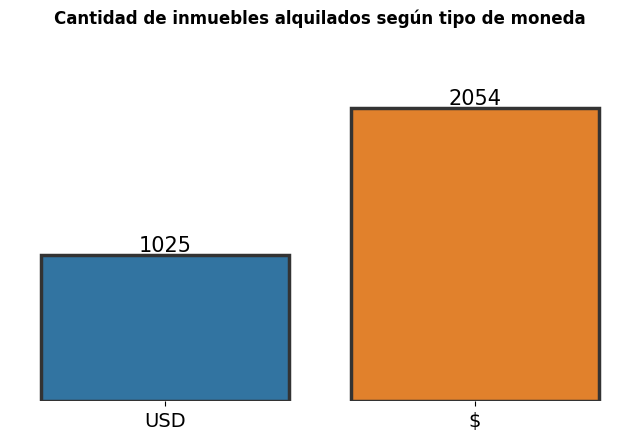

In [165]:
fig, ax= plt.subplots(figsize=(8,4))

plt.rcParams['axes.titlepad'] = 50 

plt.title('Cantidad de inmuebles alquilados según tipo de moneda',size=12,weight='bold')



sns.countplot(df_def,x='tipo_moneda',linewidth=2.5, edgecolor=".2")

ax.spines[['right', 'top', 'left','bottom']].set_visible(False)

ax.set_ylabel(None)

ax.set_xlabel(None)

plt.tick_params(labelleft=False, left=False,labelsize=14)

for i in ax.containers:
    ax.bar_label(i,fontsize=15);

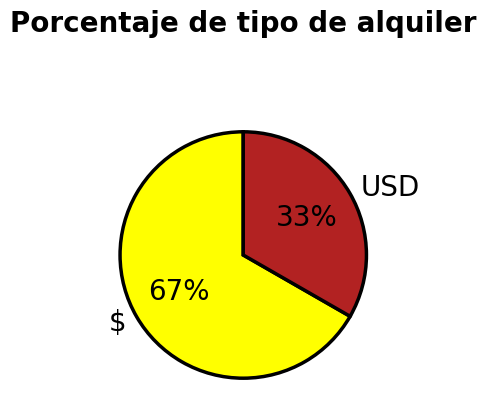

In [170]:
plt.rcParams['figure.figsize']=8,4

index = df_def['tipo_moneda'].value_counts().index.tolist() #preprocessing for plotting a pie chart
value = df_def['tipo_moneda'].value_counts().values.tolist()

plt.pie(value, labels = index, autopct='%.0f%%' ,colors=['yellow','firebrick'],wedgeprops={"edgecolor":"0",'linewidth': 2.5,
                    'antialiased': True},startangle=90,textprops={'fontsize': 20})
plt.title('Porcentaje de tipo de alquiler',size=20,weight='bold');

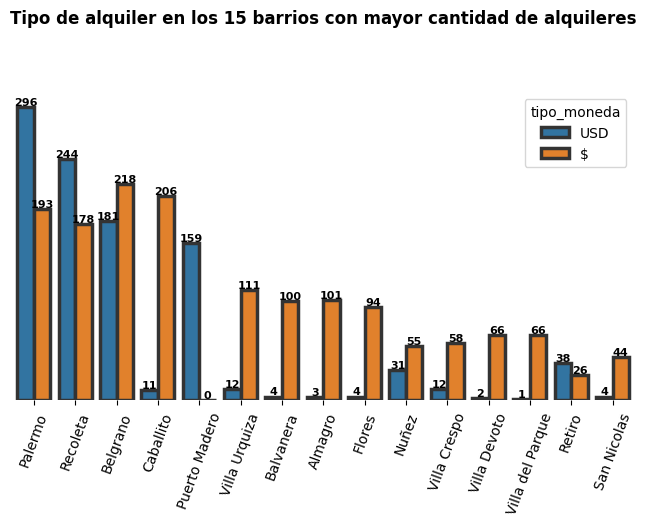

In [164]:
fig, ax= plt.subplots(figsize=(8,4))

plt.rcParams['axes.titlepad'] = 50 

plt.title('Tipo de alquiler en los 15 barrios con mayor cantidad de alquileres',size=12,weight='bold')



sns.countplot(df_def,x='barrio_mod',hue='tipo_moneda',linewidth=2.5, edgecolor=".2",order=df_def['barrio_mod'].value_counts().iloc[:15].index)

ax.spines[['right', 'top', 'left','bottom']].set_visible(False)

ax.set_ylabel(None)

ax.set_xlabel(None)

plt.xticks(rotation = 70)


plt.tick_params(labelleft=False, left=False,labelsize=10)

for i in ax.containers:
    ax.bar_label(i,fontsize=8,weight='bold');

<AxesSubplot: xlabel='barrio_mod', ylabel='alquiler'>

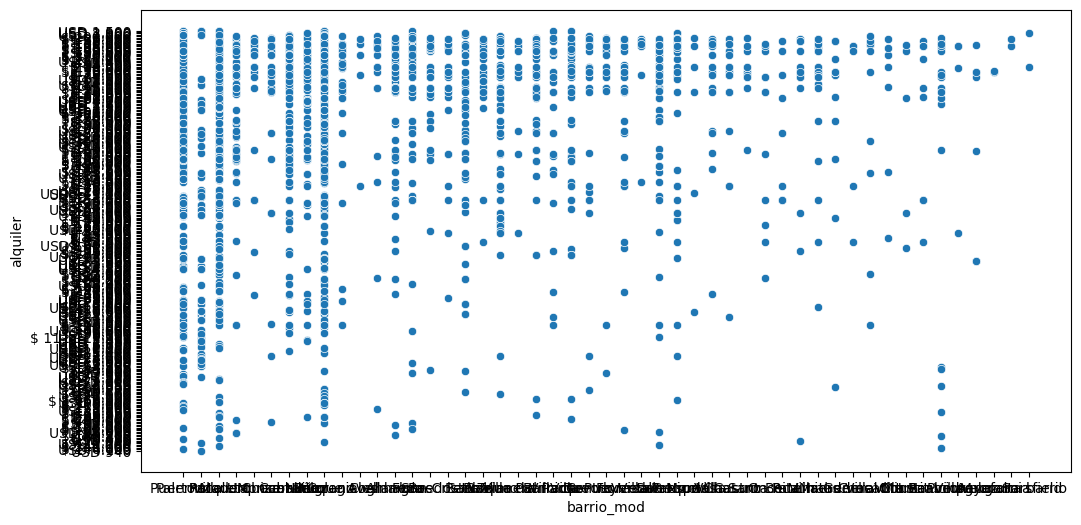

In [167]:
sns.scatterplot(df_def,x='barrio_mod',y='alquiler')